In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
Comparison = pd.read_csv("Output Data/DetectionComparison.csv")

In [3]:
Comparison

,t,ID (Dino),x (Dino),y (Dino),z (Dino),FI (Dino),t_ig,ID (CME),x (CME),y (CME),z (CME),FI (CME),Distance,Multi ID (CME),Multi Distance (CME)
0,1.0,52.0,274.48068,524.21180,5.474521,325.2,1.0,1.0,274.71,525.42,3.6937,97.04,2.164176,1,2.16
1,2.0,1.0,241.88156,606.90234,0.792882,378.0,2.0,1.0,251.01,609.49,3.5601,396.63,9.883415,NaN,NaN
2,2.0,4.0,236.99777,617.99420,2.999972,269.8,2.0,1.0,251.01,609.49,3.5601,396.63,16.400541,NaN,NaN
3,2.0,5.0,244.99545,620.90330,3.681055,330.5,2.0,1.0,251.01,609.49,3.5601,396.63,12.901661,NaN,NaN
4,2.0,27.0,249.81906,607.51350,4.625826,466.5,2.0,1.0,251.01,609.49,3.5601,396.63,2.541783,1,2.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178317,3.0,1287.0,779.89790,196.82881,158.387330,521.5,3.0,1038.0,780.30,196.43,164.0500,322.96,5.690920,NaN,NaN
178318,3.0,1311.0,783.85590,198.75996,160.985030,497.2,3.0,1038.0,780.30,196.43,164.0500,322.96,5.240914,NaN,NaN
178319,3.0,1343.0,786.05200,192.07855,160.976230,468.2,3.0,1038.0,780.30,196.43,164.0500,322.96,7.840197,NaN,NaN
178320,3.0,1440.0,773.44006,192.38249,165.005450,486.0,3.0,1038.0,780.30,196.43,164.0500,322.96,8.022094,NaN,NaN


In [4]:
M_comp = Comparison.to_numpy()
t_vec = defaultdict(list)

for t in M_comp:
    t_vec[t[0]].append(t)

for t_val in t_vec:
    t_vec[t_val] = np.array(t_vec[t_val]) 

t_list = np.zeros((len(t_vec),3), dtype=object)

In [5]:
for i, t in enumerate(t_vec):
        
    t_val = t_vec[t]
    counts = len((t_val[:,12]))
    true_counts = (np.sum(t_val[:,12] < 3.5))
    t_list[i][0] = int(t)
    t_list[i][1] = counts
    t_list[i][2] = true_counts

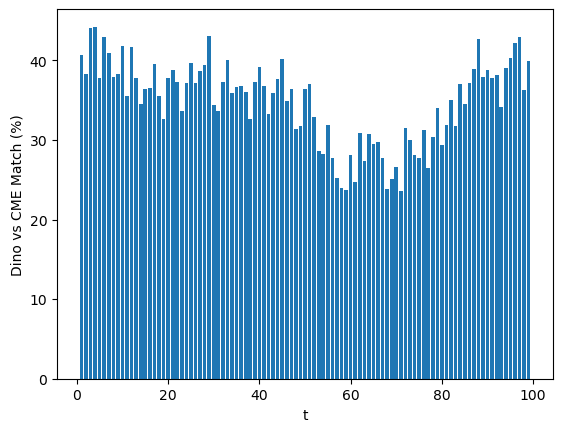

In [6]:
plt.bar(t_list[:,0], 100*t_list[:,2]/t_list[:,1])
plt.xlabel("t")
plt.ylabel("Dino vs CME Match (%)")
plt.show()

In [7]:
Comparison = Comparison.drop("t_ig", axis=1)

In [8]:
Comparison.to_csv("DINO_as_base.csv", index=False)

In [10]:
Comparison

,t,ID (Dino),x (Dino),y (Dino),z (Dino),FI (Dino),ID (CME),x (CME),y (CME),z (CME),FI (CME),Distance,Multi ID (CME),Multi Distance (CME),FI_bin
0,1.0,52.0,274.48068,524.21180,5.474521,325.2,1.0,274.71,525.42,3.6937,97.04,2.164176,1,2.16,"(85.256, 155.348]"
1,2.0,1.0,241.88156,606.90234,0.792882,378.0,1.0,251.01,609.49,3.5601,396.63,9.883415,NaN,NaN,"(365.622, 435.713]"
2,2.0,4.0,236.99777,617.99420,2.999972,269.8,1.0,251.01,609.49,3.5601,396.63,16.400541,NaN,NaN,"(365.622, 435.713]"
3,2.0,5.0,244.99545,620.90330,3.681055,330.5,1.0,251.01,609.49,3.5601,396.63,12.901661,NaN,NaN,"(365.622, 435.713]"
4,2.0,27.0,249.81906,607.51350,4.625826,466.5,1.0,251.01,609.49,3.5601,396.63,2.541783,1,2.54,"(365.622, 435.713]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178317,3.0,1287.0,779.89790,196.82881,158.387330,521.5,1038.0,780.30,196.43,164.0500,322.96,5.690920,NaN,NaN,"(295.53, 365.622]"
178318,3.0,1311.0,783.85590,198.75996,160.985030,497.2,1038.0,780.30,196.43,164.0500,322.96,5.240914,NaN,NaN,"(295.53, 365.622]"
178319,3.0,1343.0,786.05200,192.07855,160.976230,468.2,1038.0,780.30,196.43,164.0500,322.96,7.840197,NaN,NaN,"(295.53, 365.622]"
178320,3.0,1440.0,773.44006,192.38249,165.005450,486.0,1038.0,780.30,196.43,164.0500,322.96,8.022094,NaN,NaN,"(295.53, 365.622]"


In [12]:
print(np.max(Comparison["FI (CME)"]))
print(np.min(Comparison["FI (CME)"]))

1346.9
15.165


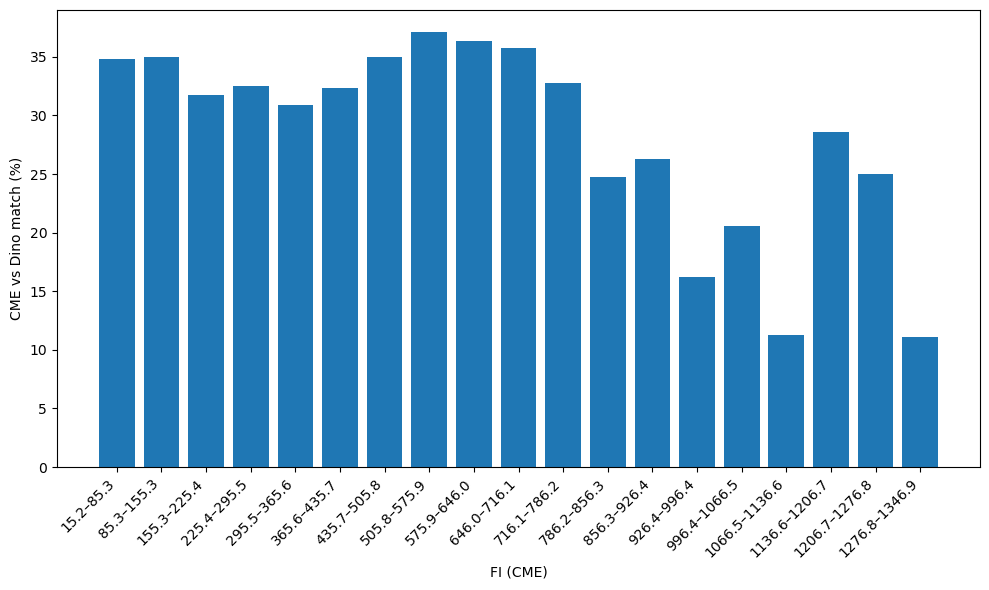

In [37]:
df = Comparison

bins = np.linspace(df["FI (CME)"].min(), df["FI (CME)"].max(), 20)

df["FI_bin"] = pd.cut(df["FI (CME)"], bins)

total_per_bin = df.groupby("FI_bin",observed =False).size()

matches_per_bin = df[df["Distance"] < 3.5].groupby("FI_bin",observed=False).size()

interval_labels = [f"{round(bins[i],1)}–{round(bins[i+1],1)}" for i in range(len(bins)-1)]

fraction = (matches_per_bin / total_per_bin).values

plt.figure(figsize=(10, 6))
plt.bar(interval_labels,100*fraction)
plt.xlabel("FI (CME)")
plt.xticks(rotation=45, ha="right")
plt.ylabel("CME vs Dino match (%)")
plt.tight_layout()
plt.show()